**Logistic Regression:**

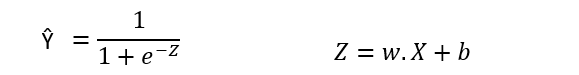

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

**Derivatives:**

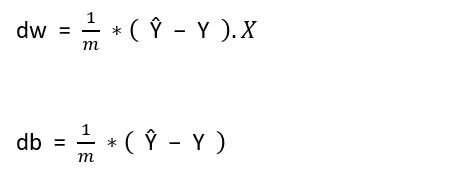

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Importing the Dependencies

In [1]:
# importing numpy library
import numpy as np

**Logistic Regression**

In [2]:
class LogisticRegression(): 
    def __init__(self, lr, epochs): 
        # initialize hyperparameters
        self.lr = lr
        self.epochs = epochs 
    
    def fit(self, X, y):
        # get number of data and features
        self.num_of_data, self.features = X.shape

        # initialize the parameters
        self.W = np.zeros(self.features)
        self.b = 0 

        self.X = X
        self.y = y

        for i in range(self.epochs):
            self.update_hyperparam()

    def update_hyperparam(self):
        # calculate y_hat 
        y_hat = 1 / (1 + np.exp( - (self.X.dot(self.W) + self.b)))

        # derivative
        dw = (1/self.num_of_data) * np.dot(self.X.T, (y_hat - self.y))
        db = (1/self.num_of_data) * np.sum(y_hat - self.y)

        # update weight and bias
        self.W = self.W - self.lr*dw
        self.b = self.b - self.lr*db

    def predict(self, X): 
        y_pred = 1 / (1 + np.exp(- (X.dot(self.W) + self.b)))
        y_pred = np.where(y_pred < 0.5, 0, 1)
        return y_pred

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Diabetes Project

In [4]:
file = "creditcard.csv"
df = pd.read_csv(file)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
legit = legit.sample(n=492)
print(legit.shape)
print(fraud.shape)

(492, 31)
(492, 31)


In [10]:
df = pd.concat([legit, fraud], axis = 0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223452,143390.0,-2.057843,2.259838,-1.859904,-1.846265,1.204105,-0.832270,1.581686,-0.288633,1.538232,...,-0.112720,0.653632,-0.181653,0.186426,0.015724,0.018796,0.474735,0.036498,7.32,0
99432,67115.0,-0.184070,-2.629156,0.302052,0.854115,-1.943506,-0.261278,0.254139,-0.142710,0.891835,...,0.507576,-0.058374,-0.664220,0.515114,-0.069926,1.032054,-0.176229,0.141215,736.00,0
61880,50027.0,1.178835,0.047582,0.767804,1.581043,-0.834343,-0.699995,-0.193193,0.010267,0.781865,...,-0.063994,-0.010788,-0.053257,0.693857,0.633955,-0.285215,0.027209,0.020336,1.56,0
232327,147130.0,2.027526,-0.394919,-1.271762,0.088196,-0.077721,-0.471102,-0.135993,-0.073212,1.036186,...,0.094317,0.523246,-0.031905,-0.450795,0.205835,0.206487,-0.036577,-0.078115,10.00,0
249496,154439.0,1.934569,-0.436949,-0.214388,0.488523,-0.711929,-0.357982,-0.606802,-0.058886,1.064746,...,0.260105,0.953948,0.177411,1.245092,-0.230656,0.562703,-0.020113,-0.031077,29.99,0


In [11]:
features = df.drop(columns="Class")
target = df["Class"]

print(features)
print(target)

            Time        V1        V2        V3        V4        V5        V6  \
223452  143390.0 -2.057843  2.259838 -1.859904 -1.846265  1.204105 -0.832270   
99432    67115.0 -0.184070 -2.629156  0.302052  0.854115 -1.943506 -0.261278   
61880    50027.0  1.178835  0.047582  0.767804  1.581043 -0.834343 -0.699995   
232327  147130.0  2.027526 -0.394919 -1.271762  0.088196 -0.077721 -0.471102   
249496  154439.0  1.934569 -0.436949 -0.214388  0.488523 -0.711929 -0.357982   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [12]:
scaler = StandardScaler()
scaler.fit(features)
std_features = scaler.transform(features)

X = std_features
y = target

print(X)
print(y)

[[ 1.12091278  0.05438052  0.12864984 ...  0.38793877 -0.00737534
  -0.38148086]
 [-0.45750267  0.39465385 -1.1909258  ... -0.25690429  0.23811581
   2.34671352]
 [-0.8111174   0.64215444 -0.46845431 ... -0.05537938 -0.04526458
  -0.40304643]
 ...
 [ 1.65814311  0.30529445 -0.17728259 ...  0.29915372  0.36271051
  -0.11726518]
 [ 1.67086977 -0.1373847  -0.32316805 ...  0.79422228 -0.68770181
   0.50839843]
 [ 1.67877478  0.78981917 -0.43852332 ... -0.07937292 -0.1288294
  -0.24965382]]
223452    0
99432     0
61880     0
232327    0
249496    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

print("Features sized")
print(X.shape)
print(X_train.shape)
print(X_test.shape)

print("Target sized")
print(y.shape)
print(y_train.shape)
print(y_test.shape)



Features sized
(984, 30)
(787, 30)
(197, 30)
Target sized
(984,)
(787,)
(197,)


In [39]:
lr = 0.01
epochs = 50000

classifier = LogisticRegression(lr = lr, epochs = epochs)
classifier.fit(X_train,y_train)

train_prediction = classifier.predict(X_train)
train_accuracy_score = accuracy_score(y_train, train_prediction)*100

test_prediction = classifier.predict(X_test)
test_accuracy_score = accuracy_score(y_test, test_prediction)*100

print("\n========== My Custom Model Summary ==========\n")
print(f"Learnig Rate: {lr}")
print(f"Epochs: {epochs} \n")
print(f"Accuracy on train data: {train_accuracy_score}%")
print(f"Accuracy on test data: {test_accuracy_score}%")


========== My Custom Model Summary ==========

Learnig Rate: 0.01
Epochs: 50000 

Accuracy on train data: 94.91740787801778%
Accuracy on test data: 93.90862944162437%
